In [218]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from rdkit import Chem

cwd = os.getcwd()
if cwd.endswith('notebook/PG'):
    os.chdir('../..')
    cwd = os.getcwd()

from src.pg_modelling.ligand_utils import sanitize_ligand_name

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)
plt.rcParams['font.family'] = 'Helvetica'

palette = sns.color_palette().as_hex()

In [52]:
data_folder = Path(os.path.expanduser('~')) / 'Documents' / 'PG_modelling' / 'ZoocinA_O54308'
assert data_folder.is_dir()

In [53]:
pg_s_zooepidemicus = pd.concat(
    [
        pd.read_excel(
            data_folder / 'S_zooepidemicus_cell_wall_library.xlsx',
            sheet_name=0,
        ),
        pd.read_excel(
            data_folder / 'S_zooepidemicus_cell_wall_library.xlsx',
            sheet_name=1,
        )
    ],
    ignore_index=True,
)
pg_s_zooepidemicus['ligand_id'] = pg_s_zooepidemicus['Name'].apply(sanitize_ligand_name)
pg_s_zooepidemicus = pg_s_zooepidemicus.set_index('ligand_id')
print(f'N = {len(pg_s_zooepidemicus):,}')
pg_s_zooepidemicus.head()

N = 483


,Name,Synonym,Formula,Monoisotopic Mass,Modifications,Degree Amidation,Degree Acetylation,Ontology,PGN Units,Glycan Units,...,Peptide,SMILES,INCHIKEY,clogP,RT,[M+H]+,[M+Na]+,[M+K]+,[M+2H]2+,[M+3H]3+
ligand_id,,,,,,,,,,,,,,,,,,,,,
K-3-NH2-AAA,None-K[3-NH2-AAA],None--Lys[3--NH2--Ala.Ala.Ala],C15H29N5O5,359.21687,EPase P2,0,0,P3--S3,1,0,...,K[3-NH2-AAA],CC(N)C(=O)NC(C)C(=O)NC(C)C(=O)NCCCCC(N)C(=O)O,CDJMGOXZPXJIPZ-UHFFFAOYSA-N,-1.9586,0,360.22415,382.20609,398.18003,180.61572,120.74624
qK-3-NH2-AAA,None-qK[3-NH2-AAA],None--γ-isoGln.Lys[3--NH2--Ala.Ala.Ala],C20H37N7O7,487.27545,EPase P1,1,0,P3--S3,1,0,...,qK[3-NH2-AAA],CC(N)C(=O)NC(C)C(=O)NC(C)C(=O)NCCCCC(NC(=O)CCC...,KAHXFTOPUVCJRZ-UHFFFAOYSA-N,-3.2083,0,488.28273,510.26467,526.23861,244.64501,163.43243
AqK-3-NH2-AAA,None-AqK[3-NH2-AAA],None--Ala.γ-isoGln.Lys[3--NH2--Ala.Ala.Ala],C23H42N8O8,558.31256,Amidase,1,0,P3--S3,1,0,...,AqK[3-NH2-AAA],CC(N)C(=O)NC(C)C(=O)NC(C)C(=O)NCCCCC(NC(=O)CCC...,IANYAHOLBSYEDC-UHFFFAOYSA-N,-3.7036,0,559.31984,581.30178,597.27572,280.16356,187.11147
K-3-NH2-AA,None-K[3-NH2-AA],None--Lys[3--NH2--Ala.Ala],C12H24N4O4,288.17976,EPase P2,0,0,P3--S2,1,0,...,K[3-NH2-AA],CC(N)C(=O)NC(C)C(=O)NCCCCC(N)C(=O)O,JWCZPEHTCFTHJE-UHFFFAOYSA-N,-1.4633,0,289.18704,311.16898,327.14292,145.09716,97.06720
qK-3-NH2-AA,None-qK[3-NH2-AA],None--γ-isoGln.Lys[3--NH2--Ala.Ala],C17H32N6O6,416.23833,EPase P1,1,0,P3--S2,1,0,...,qK[3-NH2-AA],CC(N)C(=O)NC(C)C(=O)NCCCCC(NC(=O)CCC(N)C(N)=O)...,LSONAEWDWVGBIY-UHFFFAOYSA-N,-2.7130,0,417.24561,439.22755,455.20149,209.12645,139.75339


In [54]:
subset_ids = [
    'AqKAA',
    'NAG-NAM',
    'NAG-NAM-AqKAA',
    'NAG-NAM-AqKAA-3-NH2-AA',
    'NAG-NAM-AqKAA-3-NH2-AAA',
    'KA-3-NH2-AA-3br-4-AqKA',
    'KA-3-NH2-AAA-3br-4-AqKA',
]
pg_subset = pg_s_zooepidemicus.loc[subset_ids].rename(columns={
    'SMILES': 'smiles' 
})[['smiles']]
pg_subset
pg_subset.to_csv(data_folder / 'ligands.csv')
print(f'N = {len(pg_subset):,}')
pg_subset

N = 7


,smiles
ligand_id,
AqKAA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...
NAG-NAM,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKAA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKAA-3-NH2-AA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AqKAA-3-NH2-AAA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
KA-3-NH2-AA-3br-4-AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...
KA-3-NH2-AAA-3br-4-AqKA,CC(N)C(=O)NC(CCC(=O)NC(CCCCN)C(=O)NC(C)C(=O)NC...


### Negative control: E. coli peptidoglycan fragments


In [211]:
ecoli_pg_path = data_folder / 'E_coli_cell_wall_library.xlsx'
pg_e_coli = pd.concat(
    [
        pd.read_excel(
            ecoli_pg_path,
            sheet_name=0,
        ),
        pd.read_excel(
            ecoli_pg_path,
            sheet_name=1,
        )
    ],
    ignore_index=True,
)
pg_e_coli['ligand_id'] = pg_e_coli['Name'].apply(sanitize_ligand_name)
pg_e_coli = pg_e_coli.set_index('ligand_id')
print(f'N = {len(pg_e_coli):,}')
pg_e_coli.tail()

N = 64


,Name,Synonym,Formula,Monoisotopic Mass,Modifications,Degree Amidation,Degree Acetylation,Ontology,PGN Units,Glycan Units,...,Peptide,SMILES,INCHIKEY,clogP,RT,[M+H]+,[M+Na]+,[M+K]+,[M+2H]2+,[M+3H]3+
ligand_id,,,,,,,,,,,,,,,,,,,,,
mA-3s-4-mA,None-mA;(3s-4)-None-mA,None--mDAP.Ala;(3s-4)--None--mDAP.Ala,C20H36N6O9,504.25438,EPase P2,0,0,P2--P2,2,0,...,mA,CC(NC(=O)C(N)CCCC(NC(=O)C(C)NC(=O)C(N)CCCC(N)C...,DCRASVPEQBIAIH-UHFFFAOYSA-N,-2.9431,0,505.26166,527.24360,543.21754,253.13447,169.09207
em-3s-4-NAG-NAM-AemA,None-em;(3s-4)-(NAG)(NAM)-AemA,None--γ-Glu.mDAP;(3s-4)--GlcNAc.MurNAc--Ala.γ-...,C49H80N10O27,1240.51944,EPase P1,0,2,P2--G2--P4,2,2,...,em,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...,XSDKXPRGOMKFFN-UHFFFAOYSA-N,-8.7696,0,1241.52672,1263.50866,1279.48260,621.26700,414.51376
em-3s-4-AemA,None-em;(3s-4)-None-AemA,None--γ-Glu.mDAP;(3s-4)--None--Ala.γ-Glu.mDAP.Ala,C30H50N8O15,762.33956,"Amidase, EPase P1",0,0,P2--P4,2,0,...,em,CC(N)C(=O)NC(CCC(=O)NC(CCCC(N)C(=O)O)C(=O)NC(C...,WOYTXZRXGUEYOF-UHFFFAOYSA-N,-4.2439,0,763.34684,785.32878,801.30272,382.17706,255.12047
em-3s-4-emA,None-em;(3s-4)-None-emA,None--γ-Glu.mDAP;(3s-4)--None--γ-Glu.mDAP.Ala,C27H45N7O14,691.30245,EPase P1,0,0,P2--P3,2,0,...,em,CC(NC(=O)C(CCCC(N)C(=O)O)NC(=O)CCC(N)C(=O)O)C(...,MYDQRMYHQDOWDP-UHFFFAOYSA-N,-3.7486,0,692.30973,714.29167,730.26561,346.65851,231.44143
em-3s-4-mA,None-em;(3s-4)-None-mA,None--γ-Glu.mDAP;(3s-4)--None--mDAP.Ala,C22H38N6O11,562.25986,"EPase P1, EPase P2",0,0,P2--P2,2,0,...,em,CC(NC(=O)C(N)CCCC(N)C(=O)O)C(=O)NC(CCCC(NC(=O)...,UWWXYSJDKHBKCH-UHFFFAOYSA-N,-3.0982,0,563.26714,585.24908,601.22302,282.13721,188.42723


In [212]:
all_pg = pd.concat([pg_s_zooepidemicus, pg_e_coli])
len(all_pg)

547

In [221]:
subset_ids = [
    'NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA',
    'NAG-NAM-AemAA-3s-4-NAG-NAM-AemA',

]
pg_subset_2 = all_pg.loc[subset_ids].rename(columns={
    'SMILES': 'smiles' 
})[['smiles']]
pg_subset_2.to_csv(data_folder / 'ligands_revisited.csv')
print(f'N = {len(pg_subset_2):,}')
pg_subset_2

N = 2


,smiles
ligand_id,
NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...
NAG-NAM-AemAA-3s-4-NAG-NAM-AemA,CC(=O)NC1C(OC2C(CO)OC(O)C(NC(C)=O)C2OC(C)C(=O)...


## Render ligands

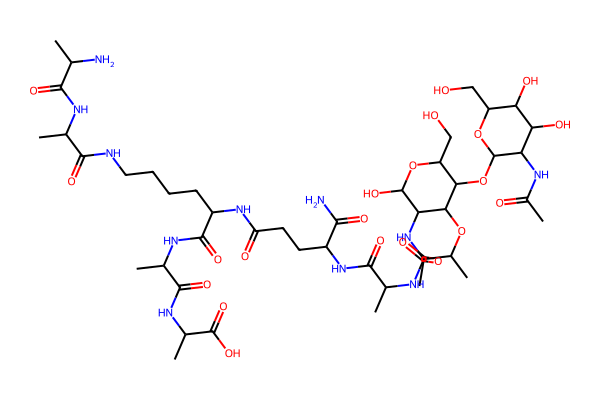

In [90]:
mol = Chem.MolFromSmiles(pg_subset.loc['NAG-NAM-AqKAA-3-NH2-AA', 'smiles'])
img = Chem.Draw.MolToImage(mol, size=(600, 400), dpi=300)
display(img)

## Results

In [164]:
ligand_to_mass = np.log10(pg_s_zooepidemicus.loc[subset_ids]['Monoisotopic Mass'])
ligand_to_mass

ligand_id
AqKAA                      2.687775
NAG-NAM                    2.695648
NAG-NAM-AqKAA              2.984732
NAG-NAM-AqKAA-3-NH2-AA     3.044355
NAG-NAM-AqKAA-3-NH2-AAA    3.071354
KA-3-NH2-AA-3br-4-AqKA     2.879351
KA-3-NH2-AAA-3br-4-AqKA    2.918283
Name: Monoisotopic Mass, dtype: float64

In [181]:
def sort_and_drop_duplicates(df):
    out_df = df.sort_values(
        [
            'protein_name', 'ligand_name', 'posebusters_score', 'aev_plig_pK', 'confidence',
        ],
        ascending=False,
    ).drop_duplicates(
        ['protein_name', 'ligand_name']
    ).set_index('ligand_name')

    out_df['mass_log'] = [ligand_to_mass[l] for l in out_df.index]
    out_df['aev_plig_pK_norm'] = [
        np.round(out_df.loc[l, 'aev_plig_pK'] / ligand_to_mass[l], 3) for l in out_df.index
    ]

    return out_df.sort_values(
        [
            'posebusters_score', 'aev_plig_pK', 'confidence',
        ],
        ascending=False
    )

### AF3

In [182]:
af3_results_all = pd.read_csv(data_folder / 'modelling' / 'af3' / 'scores.csv')
af3_results = sort_and_drop_duplicates(af3_results_all)
af3_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,231,2,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.76,0.55,0.592,20,2.3,NaN,5.74,3.071354,1.869
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,664,3,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.86,0.81,0.820,20,3.2,NaN,5.70,3.044355,1.872
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,451,2,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.80,0.64,0.672,20,2.1,NaN,5.61,2.984732,1.880
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,99,0,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.79,0.54,0.590,20,3.4,NaN,5.49,2.879351,1.907
AqKAA,ZoocinA_O54308_TRD_179_283,270,1,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.88,0.76,0.784,20,2.9,NaN,5.37,2.687775,1.998
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,124,4,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.75,0.48,0.534,20,4.5,NaN,5.31,2.918283,1.820
NAG-NAM,ZoocinA_O54308_TRD_179_283,364,3,/home/rs1521/PG/ZoocinA_O54308/modelling/af3/r...,0.87,0.78,0.798,20,2.4,NaN,5.08,2.695648,1.885


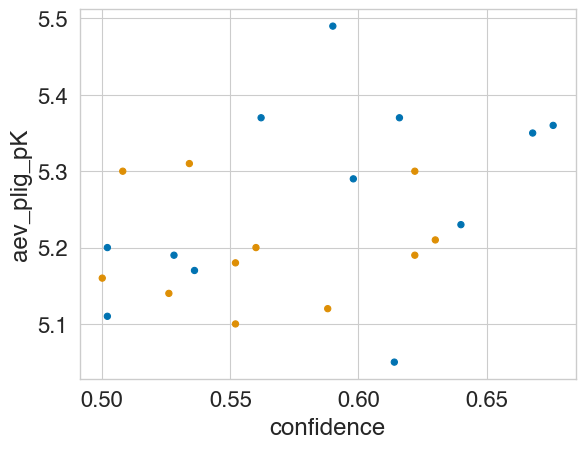

In [188]:
df = af3_results_all[
    af3_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-AA-3br-4-AqKA', 'KA-3-NH2-AAA-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

### Boltz

In [184]:
boltz_results_all = pd.read_csv(data_folder / 'modelling' / 'boltz' / 'scores.csv')
boltz_results = sort_and_drop_duplicates(boltz_results_all)
boltz_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,832,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.628348,0.195142,0.282,20,9.4,NaN,5.72,3.071354,1.862
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,721,3,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.635382,0.188728,0.278,20,4.4,NaN,5.68,3.044355,1.866
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,721,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.711614,0.324709,0.402,20,5.4,NaN,5.62,2.984732,1.883
NAG-NAM,ZoocinA_O54308_TRD_179_283,31,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.795621,0.299257,0.399,20,3.2,NaN,5.29,2.695648,1.962
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,31,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.701694,0.183597,0.287,20,7.5,NaN,5.20,2.879351,1.806
AqKAA,ZoocinA_O54308_TRD_179_283,832,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.782259,0.243946,0.352,20,9.9,NaN,5.14,2.687775,1.912
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,832,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.679646,0.164768,0.268,20,10.5,NaN,5.12,2.918283,1.754


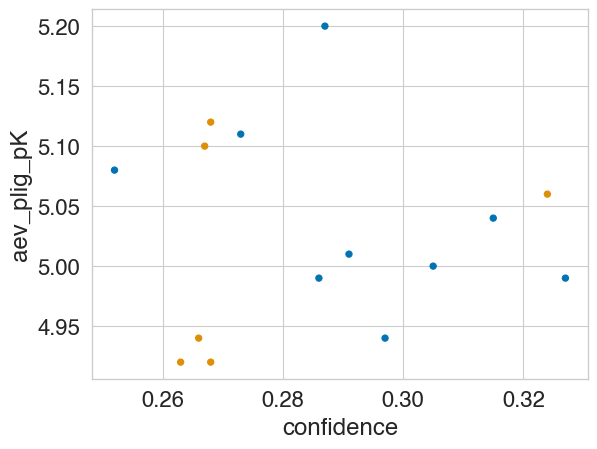

In [187]:
df = boltz_results_all[
    boltz_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-AA-3br-4-AqKA', 'KA-3-NH2-AAA-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

### Chai

In [172]:
chai_results_all = pd.read_csv(data_folder / 'modelling' / 'chai' / 'scores.csv')
chai_results = sort_and_drop_duplicates(chai_results_all)
chai_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
AqKAA,ZoocinA_O54308_TRD_179_283,802,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.901586,0.500564,0.581,20,3.4,NaN,5.37,2.687775,1.998
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,964,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.908423,0.663767,0.713,20,3.6,NaN,5.52,2.879351,1.917
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,250,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.827890,0.561590,0.615,20,2.9,NaN,5.80,3.071354,1.888
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,250,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.848731,0.523156,0.588,20,3.6,NaN,5.61,2.984732,1.880
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,802,0,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.750999,0.358523,0.437,20,5.5,NaN,5.61,3.044355,1.843
NAG-NAM,ZoocinA_O54308_TRD_179_283,964,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.885899,0.388283,0.488,20,1.7,NaN,4.94,2.695648,1.833
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,250,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.745058,0.232108,0.335,20,2.6,NaN,5.29,2.918283,1.813


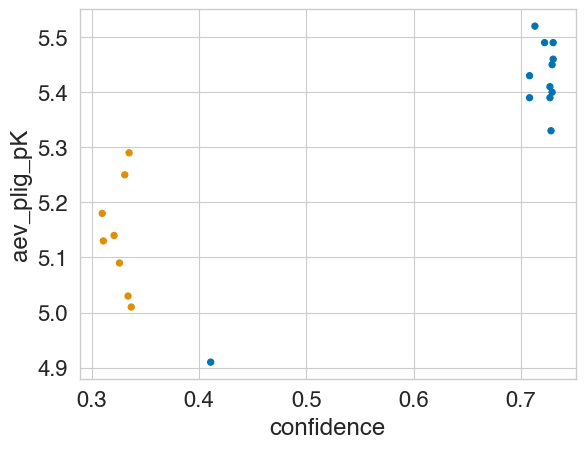

In [189]:
df = chai_results_all[
    chai_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-AA-3br-4-AqKA', 'KA-3-NH2-AAA-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

### Protenix

In [174]:
protenix_results_all = pd.read_csv(data_folder / 'modelling' / 'protenix' / 'scores.csv')
protenix_results = sort_and_drop_duplicates(protenix_results_all)
protenix_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK,mass_log,aev_plig_pK_norm
ligand_name,,,,,,,,,,,,,
NAG-NAM,ZoocinA_O54308_TRD_179_283,210,4,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.976529,0.968257,0.970,20,2.3,NaN,5.22,2.695648,1.936
AqKAA,ZoocinA_O54308_TRD_179_283,83,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.972624,0.938541,0.945,20,3.4,NaN,5.05,2.687775,1.879
NAG-NAM-AqKAA,ZoocinA_O54308_TRD_179_283,669,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.948384,0.892795,0.904,20,2.6,NaN,5.60,2.984732,1.876
NAG-NAM-AqKAA-3-NH2-AAA,ZoocinA_O54308_TRD_179_283,83,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.941013,0.886851,0.898,20,5.4,NaN,5.63,3.071354,1.833
NAG-NAM-AqKAA-3-NH2-AA,ZoocinA_O54308_TRD_179_283,669,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.965670,0.939814,0.945,20,4.1,NaN,5.54,3.044355,1.820
KA-3-NH2-AA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,669,2,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.958034,0.907875,0.918,20,44.7,NaN,5.20,2.879351,1.806
KA-3-NH2-AAA-3br-4-AqKA,ZoocinA_O54308_TRD_179_283,210,1,/gpfs/home/rs1521/PG/ZoocinA_O54308/modelling/...,0.962368,0.921656,0.930,20,4.1,NaN,5.24,2.918283,1.796


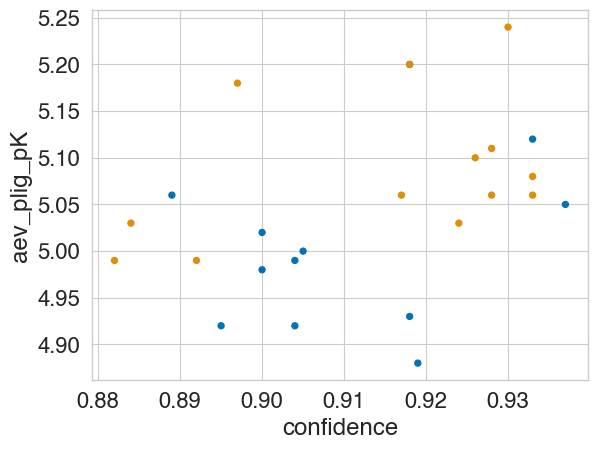

In [190]:
df = protenix_results_all[
    protenix_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['KA-3-NH2-AA-3br-4-AqKA', 'KA-3-NH2-AAA-3br-4-AqKA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

## Results with negative control

Only two ligands:
- Zoocin A natural PG substrate: NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA
- Negative control (E. coli PG): NAG-NAM-AemAA-3s-4-NAG-NAM-AemA


In [248]:
def sort_and_drop_duplicates(df):
    out_df = df.sort_values(
        [
            'protein_name', 'ligand_name', 'posebusters_score', 'aev_plig_pK', 'confidence',
        ],
        ascending=False,
    ).drop_duplicates(
        ['protein_name', 'ligand_name']
    ).set_index('ligand_name')

    return out_df.sort_values(
        [
            'posebusters_score', 'aev_plig_pK', 'confidence',
        ],
        ascending=False
    )

### AF3

In [249]:
af3_results_all = pd.read_csv(data_folder / 'modelling_revisited' / 'af3' / 'scores.csv')
af3_results = sort_and_drop_duplicates(af3_results_all)
af3_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA,ZoocinA_O54308_TRD_179_283,467,1,/home/rs1521/PG/ZoocinA_O54308_revisited/model...,0.69,0.51,0.546,20,3.5,NaN,5.88
NAG-NAM-AemAA-3s-4-NAG-NAM-AemA,ZoocinA_O54308_TRD_179_283,558,0,/home/rs1521/PG/ZoocinA_O54308_revisited/model...,0.71,0.54,0.574,20,3.4,NaN,5.81


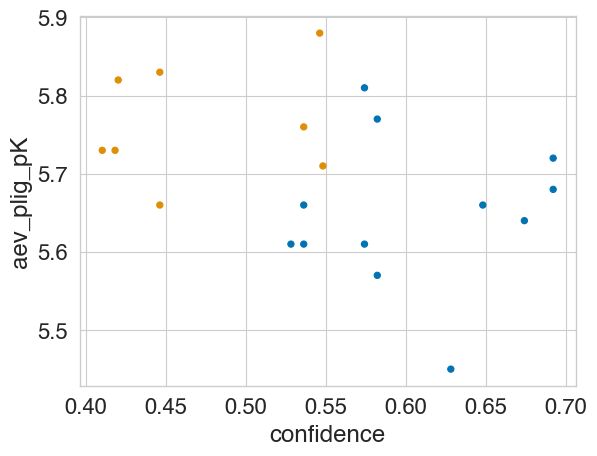

In [250]:
df = af3_results_all[
    af3_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA', 'NAG-NAM-AemAA-3s-4-NAG-NAM-AemA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

### Boltz

In [251]:
boltz_results_all = pd.read_csv(data_folder / 'modelling_revisited' / 'boltz' / 'scores.csv')
boltz_results = sort_and_drop_duplicates(boltz_results_all)
boltz_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
NAG-NAM-AemAA-3s-4-NAG-NAM-AemA,ZoocinA_O54308_TRD_179_283,611,4,/gpfs/home/rs1521/PG/ZoocinA_O54308_revisited/...,0.547722,0.219216,0.285,20,4.3,NaN,5.70
NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA,ZoocinA_O54308_TRD_179_283,50,2,/gpfs/home/rs1521/PG/ZoocinA_O54308_revisited/...,0.542967,0.221818,0.286,19,4.8,minimum_distance_to_protein,6.18


### Chai

In [252]:
chai_results_all = pd.read_csv(data_folder / 'modelling_revisited' / 'chai' / 'scores.csv')
chai_results = sort_and_drop_duplicates(chai_results_all)
chai_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA,ZoocinA_O54308_TRD_179_283,871,3,/gpfs/home/rs1521/PG/ZoocinA_O54308_revisited/...,0.645380,0.335197,0.397,20,8.5,NaN,5.69
NAG-NAM-AemAA-3s-4-NAG-NAM-AemA,ZoocinA_O54308_TRD_179_283,871,0,/gpfs/home/rs1521/PG/ZoocinA_O54308_revisited/...,0.669969,0.369667,0.430,20,2.9,NaN,5.47


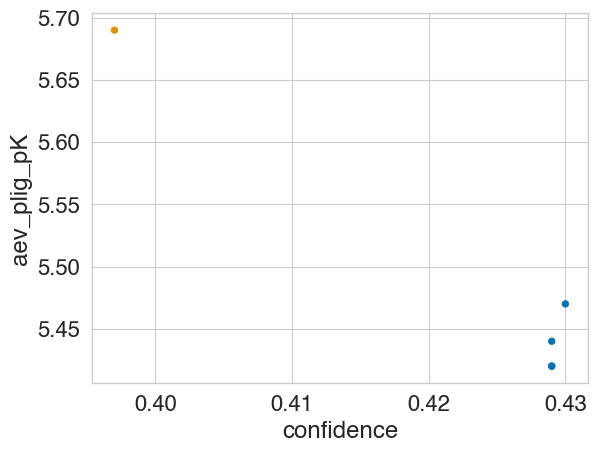

In [254]:
df = chai_results_all[
    chai_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA', 'NAG-NAM-AemAA-3s-4-NAG-NAM-AemA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);

### Protenix

In [253]:
protenix_results_all = pd.read_csv(data_folder / 'modelling_revisited' / 'protenix' / 'scores.csv')
protenix_results = sort_and_drop_duplicates(protenix_results_all)
protenix_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
NAG-NAM-AemAA-3s-4-NAG-NAM-AemA,ZoocinA_O54308_TRD_179_283,273,2,/gpfs/home/rs1521/PG/ZoocinA_O54308_revisited/...,0.922978,0.875583,0.885,20,3.2,NaN,5.79
NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA,ZoocinA_O54308_TRD_179_283,659,4,/gpfs/home/rs1521/PG/ZoocinA_O54308_revisited/...,0.904564,0.845019,0.857,20,4.6,NaN,5.75


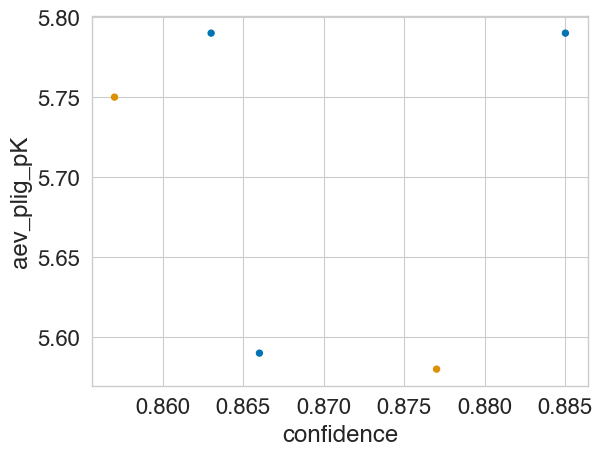

In [255]:
df = protenix_results_all[
    protenix_results_all['posebusters_score'] == 20
].set_index('ligand_name').loc[['NAG-NAM-AqKAA-3-NH2-AA-3br-4-NAG-NAM-AqKA', 'NAG-NAM-AemAA-3s-4-NAG-NAM-AemA']]
ligands = sorted(set(df.index))
colors = {
    l: palette[i]
    for i, l in enumerate(ligands)
}
df.plot.scatter(
    x='confidence', 
    y='aev_plig_pK',
    c=[colors[l] for l in df.index]
);